![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


  # **Cortex Game: Round2--Probability of Giving**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [3]:
my_folder = "/content/drive/MyDrive/retoSAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/retoSAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [4]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [5]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [6]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 3.7 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=3e69a3fe3407e2a397410b6504190cdfd92adfd3921d34bbc49315c08ba45cd2
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [7]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [8]:
#%%writefile .authinfo
#da user password 

Copy this file to home

In [9]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [10]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 355



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/retoSAS/sascfg_personal.py
WORK Path             = /saswork/SAS_work91E700013764_odaws02-usw2-2.oda.sas.com/SAS_workA4C500013764_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 79716


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [11]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 05:21:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 05:21:00 PM

33         


For local Jupyter

In [12]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

For reference: 

1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)


2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [13]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [14]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
#data_merge.head()
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
275968,2275969.0,HERRERA,TERRY,1.0,36.0,110200.0,University / College,Suburban,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
265543,2265544.0,THORNTON,CHRISTOPHER,0.0,42.0,216900.0,University / College,Rural,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## Treating Missing Values

Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [15]:
# In this case, we are replacing MinGift with 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  
data_merge[['TotalGift']] = data_merge[['TotalGift']].fillna(value=0)  

data_merge.sample(3)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
224857,2224858.0,JASSO,JAMES,0.0,18.0,18700.0,University / College,Suburban,9.0,0.0,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
530734,2530735.0,MCNEAL,AMANDA,1.0,20.0,4600.0,University / College,Suburban,4.0,0.0,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
422797,2422798.0,STAPP,JILL,1.0,25.0,63800.0,University / College,City,8.0,4.0,...,1.0,6.0,500.0,500.0,500.0,0.0,0.0,0.0,1.0,20.0


## Data Partition

In [16]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.5, random_state=5678) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
295612,2295613.0,SILVA,EVELYN,1.0,37.0,73100.0,University / College,Downtown,1.0,0.0,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
102523,2102524.0,GUERRERO,JENNIFER,1.0,79.0,28200.0,High School,Suburban,4.0,0.0,...,2.0,4.0,190.0,40.0,150.0,0.0,0.0,0.0,0.0,0.0


# Prebuilt Models

The sk-learn library offers more advanced models. 

sk-learn library: https://scikit-learn.org/stable/index.html  

## Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

#comment: it's numpy array ==> categorical variables
X_train = train[['Age', 'Salary','MinGift', 'GaveLastYear','Contact', 'Woman', 'NbActivities']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'GaveLastYear','Contact', 'Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

regr = LogisticRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [18]:
#you can change the criteria

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, regr_predict)
print(confusion_matrix)

[[425496     11]
 [ 74489      4]]


In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, regr_predict))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    425507
         1.0       0.27      0.00      0.00     74493

    accuracy                           0.85    500000
   macro avg       0.56      0.50      0.46    500000
weighted avg       0.76      0.85      0.78    500000



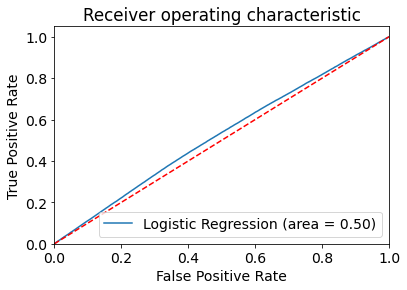

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

logit_roc_auc = roc_auc_score(Y_valid, regr.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, regr.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Decision Tree Model

In [21]:
from sklearn.tree import DecisionTreeClassifier

X_train = train[['Age','Salary','TotalGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age','Salary','TotalGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

DT_model = DecisionTreeClassifier(max_depth=5,criterion="entropy").fit(X_train,Y_train)
DT_predict_proba = DT_model.predict_proba(X_valid) #Predictions on Testing data
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
DT_probs = DT_model.predict_proba(X_valid)[:, 1]
print(DT_probs)

[0.07761001 0.07761001 0.07761001 ... 0.07761001 0.16773652 0.3751701 ]


In [22]:
#you can change the criteria
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(Y_valid, DT_predict)
print(confusion_matrix)


[[420852   4655]
 [ 67111   7382]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    425507
         1.0       0.61      0.10      0.17     74493

    accuracy                           0.86    500000
   macro avg       0.74      0.54      0.55    500000
weighted avg       0.83      0.86      0.81    500000



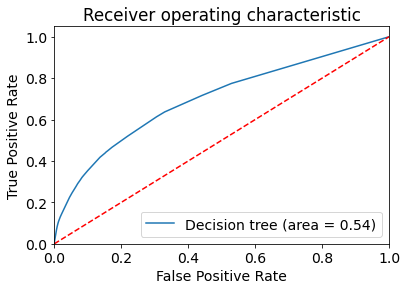

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, DT_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

### *Other models may also be helpful for this game*

Reference: https://scikit-learn.org/stable/supervised_learning.html
    

## XGBoost Classifier Model

In [25]:
from xgboost import XGBClassifier

X_train = train[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

XGB_model = XGBClassifier(max_depth=5).fit(X_train,Y_train)
XGB_predict_proba = XGB_model.predict_proba(X_valid) #Predictions on Testing data
XGB_predict = XGB_model.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
XGB_probs = XGB_model.predict_proba(X_valid)[:, 1]
print(XGB_probs)

[0.07736149 0.07785751 0.07666208 ... 0.07676619 0.17407568 0.34240067]


In [26]:
#you can change the criteria
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix = confusion_matrix(Y_valid, XGB_predict)
score = accuracy_score(Y_valid, XGB_predict)
print(confusion_matrix)
print(score)


[[420281   5226]
 [ 66389   8104]]
0.85677


In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, XGB_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    425507
         1.0       0.61      0.11      0.18     74493

    accuracy                           0.86    500000
   macro avg       0.74      0.55      0.55    500000
weighted avg       0.83      0.86      0.81    500000



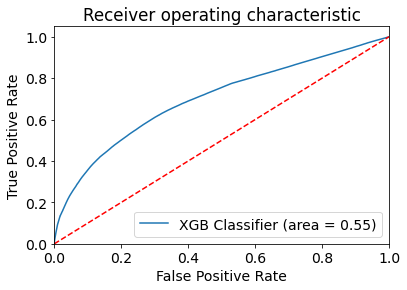

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

XGB_roc_auc = roc_auc_score(Y_valid, XGB_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, XGB_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB Classifier (area = %0.2f)' % XGB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

## Scoring New Data

### Prepare data for scoring

In [29]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='SCORE_RD2_NOCONTACT',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the Decision Tree model performed better than the Logistic Regression model based on the AUC criterion.

### Predict 'probability of giving' for members who were contacted

In [30]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0) 
scoring_data_contact[['TotalGift']] = scoring_data_contact[['TotalGift']].fillna(value=0) 


#scoring_data_contact.head()

X = scoring_data_contact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
#DT_predict_contact=DT_model.predict_proba(X)[:,1]
#scoring_data_contact['Prediction_prob'] = DT_predict_contact

XGB_predict_contact=XGB_model.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = XGB_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.288197
1,2000002.0,0.601295
2,2000003.0,0.634213
3,2000004.0,0.386355
4,2000005.0,0.544932


### Predict 'probability of giving' for members who were not contacted

In [31]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0) 
scoring_data_nocontact[['TotalGift']] = scoring_data_nocontact[['TotalGift']].fillna(value=0) 


#scoring_data_contact.head()

X = scoring_data_nocontact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
#DT_predict_nocontact=DT_model.predict_proba(X)[:,1]
#scoring_data_nocontact['Prediction_prob'] = DT_predict_nocontact

XGB_predict_nocontact=XGB_model.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = XGB_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.116798
1,2000002.0,0.103712
2,2000003.0,0.079093
3,2000004.0,0.078480
4,2000005.0,0.075658


In [32]:
result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], inplace=True)
result_Prob.sample(10)

,ID,ProbContact,ProbNoContact
239109,2239110.0,0.386142,0.079784
306317,2306318.0,0.132872,0.103322
867473,2867474.0,0.108841,0.139934
325033,2325034.0,0.472446,0.284047
467791,2467792.0,0.468302,0.285719
34393,2034394.0,0.263254,0.104740
120012,2120013.0,0.423351,0.094141
383670,2383671.0,0.381214,0.079280
790217,2790218.0,0.631066,0.080744
335767,2335768.0,0.629027,0.079282


## Exporting Results to a CSV File

In [39]:
result_Prob.to_csv('Round2_Output_prob.csv', index=False)

In [40]:
import pandas as pd

NB = 175000

probabilities = pd.read_csv("Round2_Output_prob.csv")
amounts = pd.read_csv("Round2_Output_amt.csv")

def Calc_Uplift(raw_data):
    return ((raw_data['AmtContact']*raw_data['ProbContact']) - (raw_data['AmtNoContact']*raw_data['ProbNoContact']))

raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")
raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

# Sorting data by descending Uplift value
raw_submission.sort_values(by=['Uplift'], ascending=False, inplace=True)


In [41]:
# Export the final csv file

submission = raw_submission.head(NB)

submission.to_csv('Round2 Output final.csv', index=False)


In [42]:
# Congratulations! You are now done with Round 2. You are ready to prepare your solution to upload it to the leaderboard.

In [43]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.

In [44]:
!head Round2\ Output\ final.csv

ID,ProbContact,ProbNoContact,AmtContact,AmtNoContact,Uplift
2111016.0,0.5356267,0.17256172,1015.2396,1015.2396,368.59794506920804
2772019.0,0.52260894,0.14463441,912.17017,912.17017,344.7770912857701
2489006.0,0.4705803,0.18494992,1180.1329,1180.1329,337.08180867750207
2223801.0,0.48610562,0.22020471,1205.1597,1205.1597,320.453060925327
2382554.0,0.48760942,0.16859476,965.6754,965.6754,308.064609401364
2170151.0,0.43198642,0.16113538,1038.8632,1038.8632,281.377178137728
2052612.0,0.6133088,0.09112525,525.1284,525.1284,274.21341211782004
2388572.0,0.6133088,0.09112525,525.1284,525.1284,274.21341211782004
2444451.0,0.5672775,0.07127922,501.0834,501.0834,248.536504536552
